In [12]:
import pandas as pd

#import data
data = pd.read_csv('hotel_bookings.csv')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Analyzing the raw data (EDA)
Exploring the types of each variable and some basic statistical information.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [3]:
#only the categorical ones
data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [4]:
#only int and float
data.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Graphical Analysis
Analyzing the behavior of some variables and checking the need for normalization of quantitative variables.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

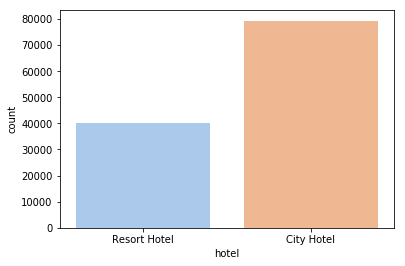

In [6]:
#checking the hotel types distribution
sns.countplot(data['hotel'], palette='pastel')

Text(0.5, 0, 'Canceled')

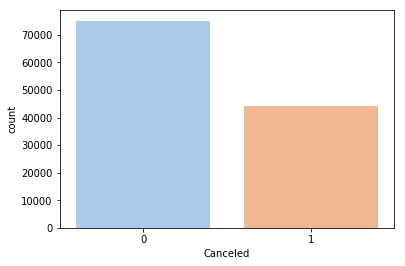

In [7]:
#checking the proportion of canceled bookings
plot = sns.countplot(data['is_canceled'], palette='pastel')
plot.set_xlabel("Canceled")

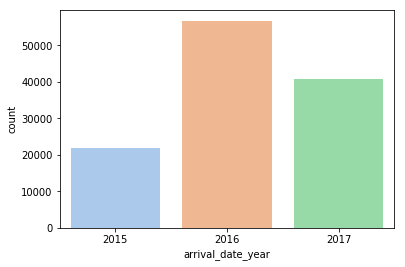

In [11]:
#checking the years distribution
sns.countplot(data['arrival_date_year'], palette='pastel')

Text(0, 0.5, 'Previous Cancellations')

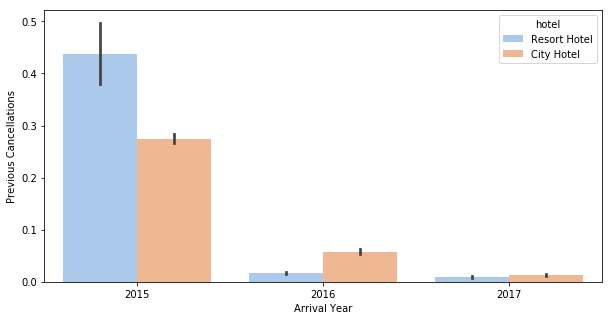

In [57]:
#checking previous cancellations by hotel type on years
plt.figure(figsize=(10,5))
plot = sns.barplot(data['arrival_date_year'], data['previous_cancellations'], hue=data['hotel'], palette='pastel')
plot.set_xlabel("Arrival Year")
plot.set_ylabel("Previous Cancellations")

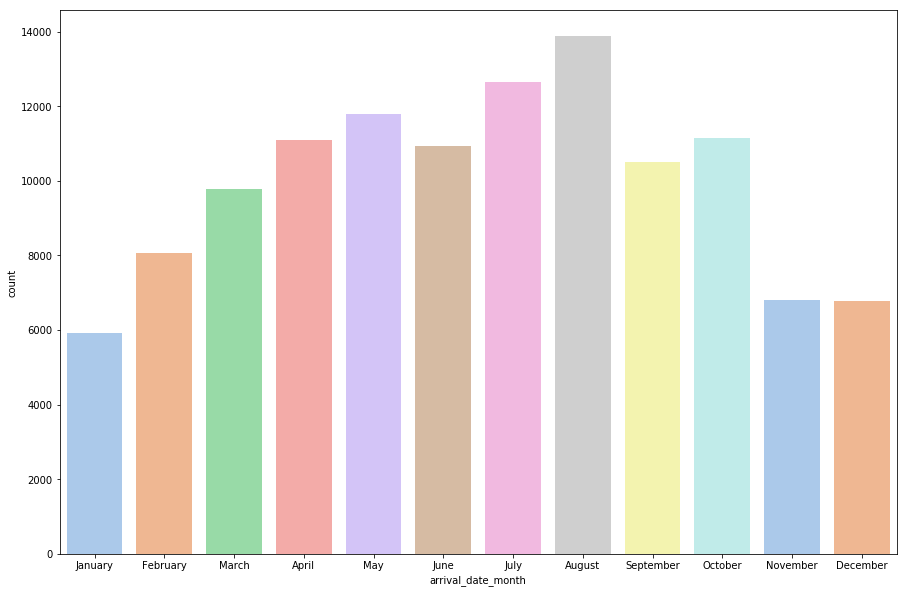

In [12]:
#Checking the months distribution
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,10))
sns.countplot(data['arrival_date_month'], order=month_order, palette='pastel')

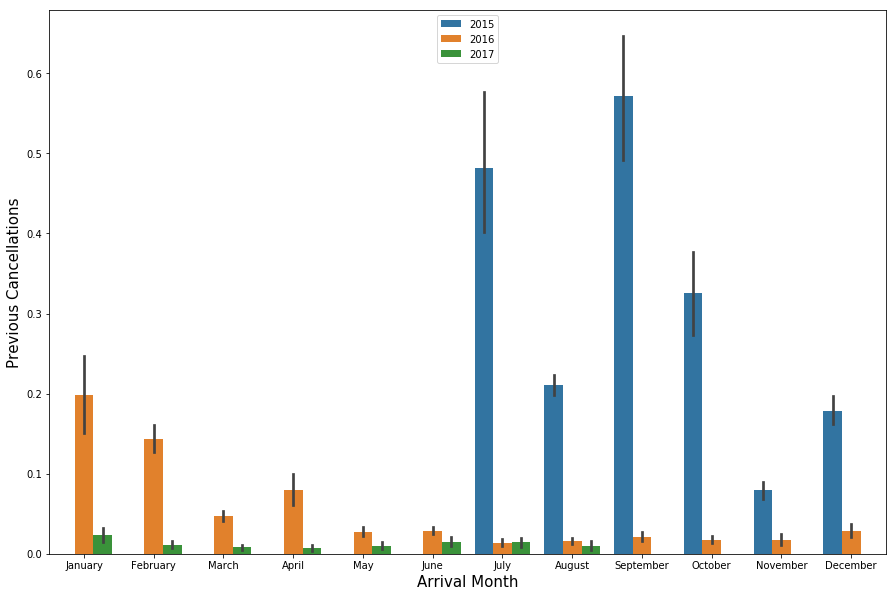

In [9]:
#checking previous cancellations on arrival months on each year
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,10))
plot = sns.barplot(data['arrival_date_month'], data['previous_cancellations'], hue=data['arrival_date_year'], order=month_order)
plot.set_xlabel("Arrival Month", fontsize=15)
plot.set_ylabel("Previous Cancellations", fontsize=15)
plt.legend(loc='best')

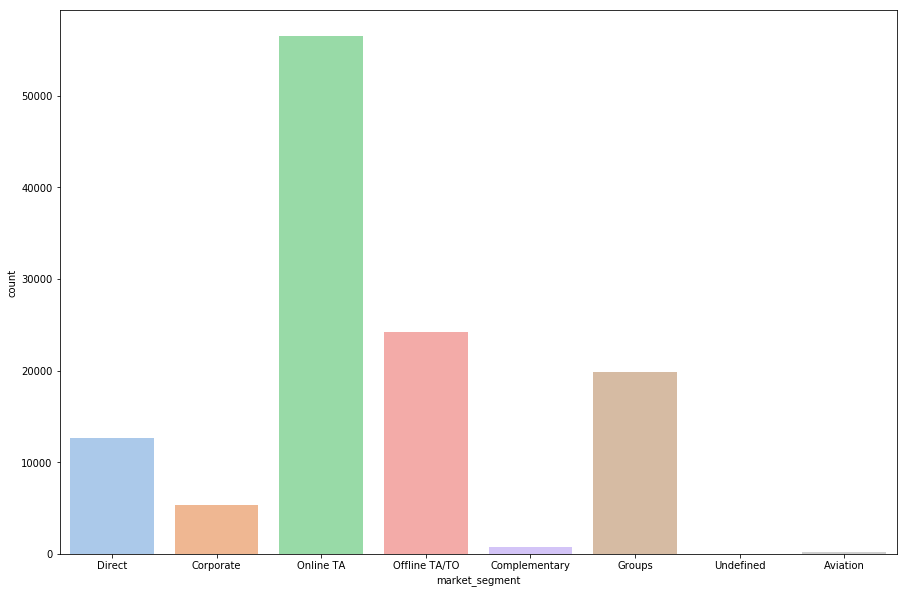

In [10]:
#checking the frequency of the segments for which reservations were made
plt.figure(figsize=(15,10))
sns.countplot(data['market_segment'], palette='pastel')

### Checking distribution of some variables

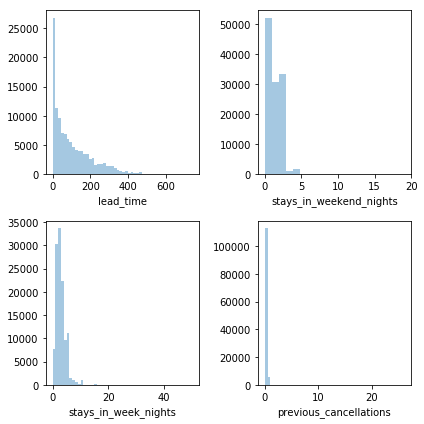

In [13]:
f = plt.figure(figsize=(6,6))
grid_spec = f.add_gridspec(2,2)

ax = f.add_subplot(grid_spec[0,0])
sns.distplot(data['lead_time'], kde=False)

ax = f.add_subplot(grid_spec[0,1])
sns.distplot(data['stays_in_weekend_nights'], bins=20, kde=False)

ax = f.add_subplot(grid_spec[1,0])
sns.distplot(data['stays_in_week_nights'], kde=False)

ax = f.add_subplot(grid_spec[1,1])
sns.distplot(data['previous_cancellations'], kde=False)

f.tight_layout()

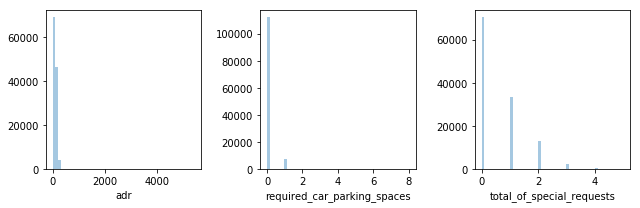

In [14]:
f = plt.figure(figsize=(9,3))
grid_spec = f.add_gridspec(1,3)

ax = f.add_subplot(grid_spec[0,0])
sns.distplot(data['adr'], kde=False)

ax = f.add_subplot(grid_spec[0,1])
sns.distplot(data['required_car_parking_spaces'], kde=False)

ax = f.add_subplot(grid_spec[0,-1])
sns.distplot(data['total_of_special_requests'], kde=False)

f.tight_layout()

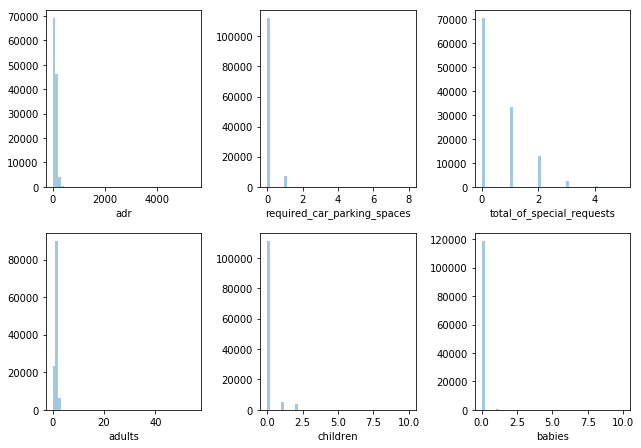

In [15]:
f = plt.figure(figsize=(9,9))
grid_spec = f.add_gridspec(3,3)

ax = f.add_subplot(grid_spec[0,0])
sns.distplot(data['adr'], kde=False)

ax = f.add_subplot(grid_spec[0,1])
sns.distplot(data['required_car_parking_spaces'], kde=False)

ax = f.add_subplot(grid_spec[0,-1])
sns.distplot(data['total_of_special_requests'], kde=False)

ax = f.add_subplot(grid_spec[1,0])
sns.distplot(data['adults'], kde=False)

ax = f.add_subplot(grid_spec[1,1])
sns.distplot(data['children'], kde=False)

ax = f.add_subplot(grid_spec[1,-1])
sns.distplot(data['babies'], kde=False)

f.tight_layout()

### Data Wrangling
Performing transformations in data to adapt to prediction models.

In [13]:
import numpy as np

In [14]:
#checking for the existence of null values in each variable.
def num_missing(x):
    return sum(x.isnull())

#applying in collumns
print('Number of missing values by collumns:')
print(data.apply(num_missing, axis = 0))

Number of missing values by collumns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent              

The "agent" and "company" variables have many null values and do not seem to be significant for the model, so I performed the removal.

In [15]:
data = data.drop(['agent', 'company'], axis=1)

Analyzing the lead time variable distribution earlier, I noticed an asymmetric distribution. I decided to check for outliers and perform a logarithmic normalization process.

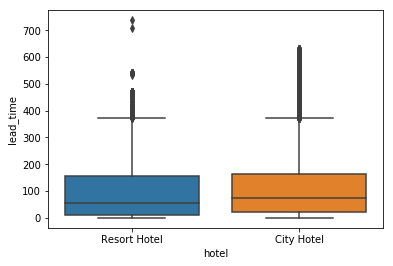

In [19]:
#checking outliers in lead_time variable
sns.boxplot(data['hotel'], data['lead_time'], orient="v")

Since the lead_time variable has many zero values, I had to add 1 to be able to perform the logarithmic operation.

In [16]:
leadtime = data.iloc[:, 2]
leadtime_zero = []
for value in leadtime:
    if value == 0:
        leadtime_zero.append(leadtime)

print('Zero values: ', + len(leadtime_zero))

leadtime_log = []
for value in leadtime:
    if value == 0:
        leadtime_log.append(np.log(value+1))
    else:
        leadtime_log.append(np.log(value))

#checking if persists the same samples size
print('Size: ', + len(leadtime_log))

Zero values:  6345
Size:  119390


In [17]:
#transforming in numpy array
leadtime_log = np.asarray(leadtime_log)
print(leadtime_log)

[5.83481074 6.60258789 1.94591015 ... 3.52636052 4.69134788 5.32300998]


In [18]:
#add new collum in data
data['lead_time_log'] = leadtime_log
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_log
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,5.834811
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,6.602588
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.945910
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2.564949
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.639057


Text(0.5, 1.0, 'lead_time with log')

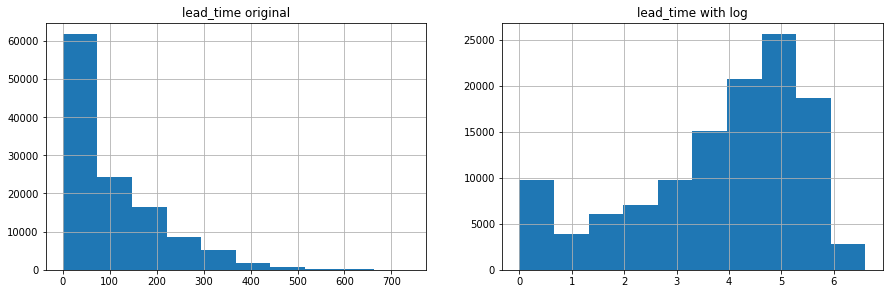

In [23]:
#comparing lead_time before and after log normalization
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
data['lead_time'].hist()
plt.title('lead_time original')

plt.subplot(2,2,2)
data['lead_time_log'].hist()
plt.title('lead_time with log')

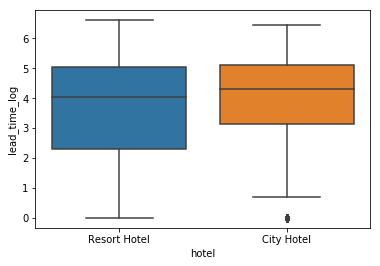

In [24]:
#checking if the outliers still persists.
sns.boxplot(data['hotel'], data['lead_time_log'], orient="v")

Replacing missing values in children variable by the mean and country variable by the mode.

In [19]:
data['children'].fillna(data['children'].mean(), inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)

#verifying missing values
print(data.apply(num_missing, axis = 0))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
#dropping original lead_time and reservation_status_date
data = data.drop(['lead_time', 'reservation_status_date'], axis=1)
data.head(5)

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_log
0,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,5.834811
1,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,6.602588
2,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1.945910
3,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2.564949
4,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2.639057


In [24]:
#correlation betwen variables
corr = data.corr()
corr

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,lead_time_log
is_canceled,1.000000,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658,0.319718
arrival_date_year,0.016660,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054622,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531,0.059237
arrival_date_week_number,0.008148,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149,0.101695
arrival_date_day_of_month,-0.006130,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062,0.009306
stays_in_weekend_nights,-0.001791,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045792,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671,0.190043
stays_in_week_nights,0.024765,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044202,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192,0.271794
adults,0.060017,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030446,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884,0.182810
children,0.005048,0.054622,0.005518,0.014544,0.045792,0.044202,0.030446,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324841,0.056253,0.081743,-0.004041
babies,-0.032491,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889,-0.016758
is_repeated_guest,-0.084793,0.010341,-0.030131,-0.006145,-0.087239,-0.097245,-0.146426,-0.032859,-0.008943,1.000000,0.082293,0.418056,0.012092,-0.022235,-0.134314,0.077090,0.013050,-0.236073


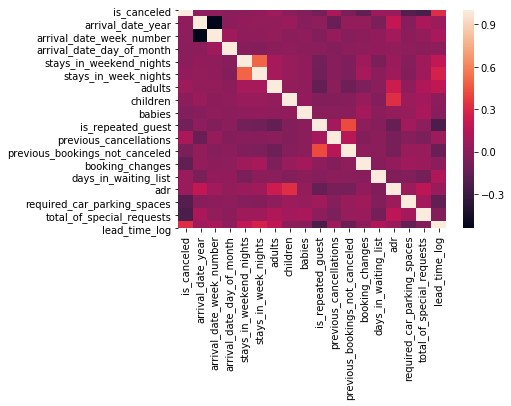

In [25]:
#heatmap for visualization
sns.heatmap(corr)

### Models Building
Adapting attributes and label to prediction models and performing trainnings. 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#separating attributes and labels
label = data.iloc[:, 1].values
attributes_data = data.drop('is_canceled', axis=1)
attributes_data.head(5)

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_log
0,Resort Hotel,2015,July,27,1,0,0,2,0.0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,5.834811
1,Resort Hotel,2015,July,27,1,0,0,2,0.0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,6.602588
2,Resort Hotel,2015,July,27,1,0,1,1,0.0,0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1.945910
3,Resort Hotel,2015,July,27,1,0,1,1,0.0,0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2.564949
4,Resort Hotel,2015,July,27,1,0,2,2,0.0,0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2.639057


In [29]:
attributes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
hotel                             119390 non-null object
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 

In [15]:
#converting the collumns 0,2,10,11,12,13,17,18,20,22,26
attributes = attributes_data.values

label_encoder = LabelEncoder()
attributes[:, 0] = label_encoder.fit_transform(attributes[:, 0])
attributes[:, 2] = label_encoder.fit_transform(attributes[:, 2])
attributes[:, 10] = label_encoder.fit_transform(attributes[:, 10])
attributes[:, 11] = label_encoder.fit_transform(attributes[:, 11])
attributes[:, 12] = label_encoder.fit_transform(attributes[:, 12])
attributes[:, 13] = label_encoder.fit_transform(attributes[:, 13])
attributes[:, 17] = label_encoder.fit_transform(attributes[:, 17])
attributes[:, 18] = label_encoder.fit_transform(attributes[:, 18])
attributes[:, 20] = label_encoder.fit_transform(attributes[:, 20])
attributes[:, 22] = label_encoder.fit_transform(attributes[:, 22])
attributes[:, 26] = label_encoder.fit_transform(attributes[:, 26])

print('Verifying if there are only numbers in attributes:\n')
print(attributes[0:5])
print('\nAttributes lenght: ', + len(attributes))
print('Labels lenght: ', + len(label))

Verifying if there are only numbers in attributes:

[[1 2015 5 27 1 0 0 2 0.0 0 0 135 3 1 0 0 0 2 2 3 0 0 2 0.0 0 0 1
  5.834810737062605]
 [1 2015 5 27 1 0 0 2 0.0 0 0 135 3 1 0 0 0 2 2 4 0 0 2 0.0 0 0 1
  6.602587892189336]
 [1 2015 5 27 1 0 1 1 0.0 0 0 59 3 1 0 0 0 0 2 0 0 0 2 75.0 0 0 1
  1.9459101490553132]
 [1 2015 5 27 1 0 1 1 0.0 0 0 59 2 0 0 0 0 0 0 0 0 0 2 75.0 0 0 1
  2.5649493574615367]
 [1 2015 5 27 1 0 2 2 0.0 0 0 59 6 3 0 0 0 0 0 0 0 0 2 98.0 0 1 1
  2.6390573296152584]]

Attributes lenght:  119390
Labels lenght:  119390


## Models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#split train x test
X_train, X_test, y_train, y_test = train_test_split(attributes, label, test_size=0.3, random_state=0)

#function for model training and report
def model_report(model):
    model.fit(X_train, y_train)
    predicts = model.predict(X_test)
    cm = confusion_matrix(y_test, predicts)
    acc = accuracy_score(y_test, predicts)
    cr = classification_report(y_test, predicts)
    print('Confusion Matrix:\n')
    print(cm)
    print('\nAccuracy: ', +  acc*100)
    print('\nClassification Report:')
    print(cr)

### Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

#training decision tree classifier
dtc = DecisionTreeClassifier()
model_report(dtc)

Confusion Matrix:

[[22371     0]
 [    0 13446]]

Accuracy:  100.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22371
           1       1.00      1.00      1.00     13446

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



I always suspect when I get 100% accuracy on models. Since DecisionTreeClassifier does not usually do well with a large number of attributes, overfitting has most likely occurred. I'm still investigating.

### Naive Bayes (GaussianNB)

In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
model_report(nb)

Confusion Matrix:

[[22097   274]
 [    0 13446]]

Accuracy:  99.23500013959851

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22371
           1       0.98      1.00      0.99     13446

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817



### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model_report(lr)

C:\Users\---EDUCASAT---\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix:

[[22371     0]
 [  384 13062]]

Accuracy:  98.92788340732055

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22371
           1       1.00      0.97      0.99     13446

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817

